In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



## Load Data

In [2]:
# Load preprocessed dataset
df = pd.read_csv('../data/clean_data.csv') 
X = df.drop('disease', axis=1)  # features
y = df['disease']                # label


## Apply PCA

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


## Visualize Explained Variance

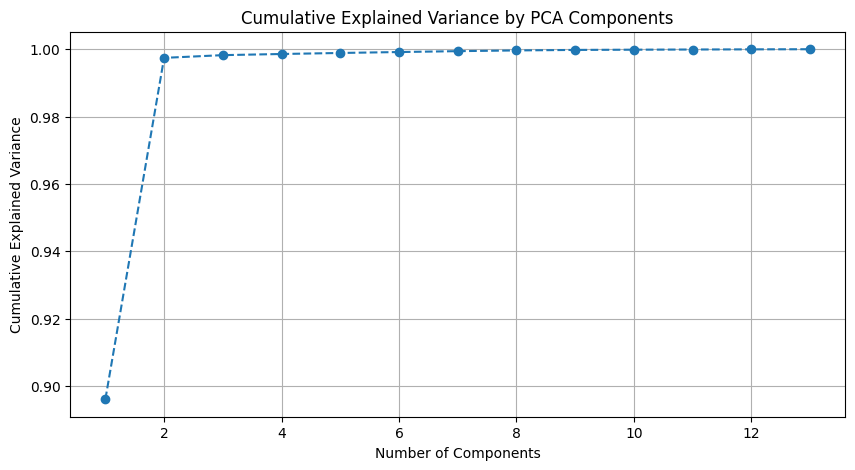

In [4]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [5]:
# Choose the number of PCA components (e.g., 8)
pca = PCA(n_components=8)
X_pca_selected = pca.fit_transform(X)  # Apply PCA on scaled data

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(8)])
pca_df['target'] = y.values  # Add the target column

# Save the PCA-transformed dataset for later use
pca_df.to_csv('../data/heart_disease_pca.csv', index=False)